In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
fHV15kV = '/Users/yuntse/data/slarchetto/hv_osci_20220813/grndToVesselHV15kV_0.csv'
fHV0kV = '/Users/yuntse/data/slarchetto/hv_osci_20220813/grndToVesselHV0_0.csv'
fHVPSOff = '/Users/yuntse/data/slarchetto/hv_osci_20220813/grndToVesselPSoff_0.csv'

In [3]:
# number of bins
n = 2000
# Total time period, in second
T = 2e-10*n

HV15kV = pd.read_csv(fHV15kV, header = None, skiprows = 2, names = ['Time', 'Voltage'] )
HV0kV = pd.read_csv(fHV0kV, header = None, skiprows = 2, names = ['Time', 'Voltage'], nrows = n )
HVPSOff = pd.read_csv(fHVPSOff, header = None, skiprows = 2, names = ['Time', 'Voltage'], nrows = n )

In [4]:
avgHV15kV = HV15kV['Voltage'].mean()
avgHV0kV = HV0kV['Voltage'].mean()
avgHVPSOff = HVPSOff['Voltage'].mean()
print( avgHV15kV, avgHV0kV, avgHVPSOff )

-1.188044238649309 -0.0028381909243745894 -0.010633165715247682


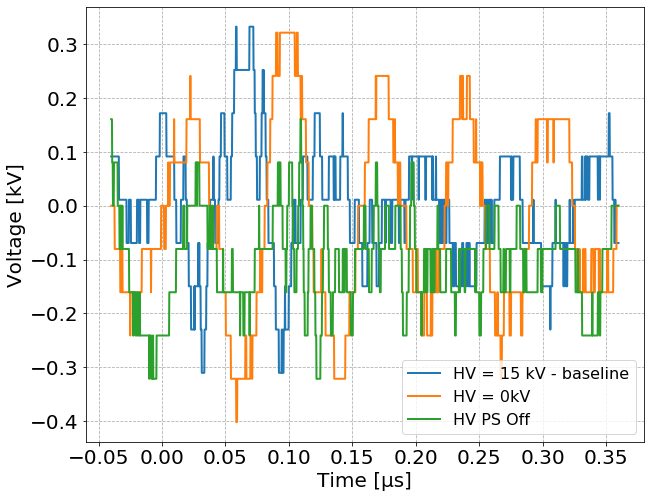

In [7]:
plt.figure(figsize = (10,8))
plt.plot( HV15kV['Time']*1e6, ( HV15kV['Voltage'] - avgHV15kV )*10, label = 'HV = 15 kV - baseline', lw = 2 )
plt.plot( HV0kV['Time']*1e6, HV0kV['Voltage']*10, label = 'HV = 0 kV', lw = 2 )
plt.plot( HVPSOff['Time']*1e6, HVPSOff['Voltage']*10, label = 'HV PS Off', lw = 2 )

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.grid(which = "both", linestyle = '--')
plt.xlabel('Time [µs]', fontsize = 20)
plt.ylabel('Voltage [kV]', fontsize = 20)
plt.legend( loc = 'lower right', fontsize = 16 )

# plt.xlim(0, 55)
# plt.ylim(0, 4e9)
plt.show()
# plt.savefig('SNSNuFlux.pdf')

In [8]:
HV15kVdata = np.empty([0,1], float)
HV0kVdata = np.empty([0,1], float)
HVPSOffdata = np.empty([0,1], float)

# Also make the unit kV
for i in range( 0, n ):
    HV15kVdata = np.append( HV15kVdata, (HV15kV['Voltage'][i] - avgHV15kV)*10 )
    HV0kVdata = np.append( HV0kVdata, (HV0kV['Voltage'][i] - avgHV0kV)*10 )
    HVPSOffdata = np.append( HVPSOffdata, (HVPSOff['Voltage'][i] - avgHVPSOff)*10 )

In [9]:
round5 = lambda avgHV: round(avgHV, 5)
round5array = lambda a: np.array(list(map(round5, a)))

In [10]:
HV15kVft = np.fft.rfft(HV15kVdata[:-1])
# round5array(HV15kVft)
HV0kVft = np.fft.rfft(HV0kVdata[:-1])
HVPSOffft = np.fft.rfft(HVPSOffdata[:-1])

In [11]:
coeff15kV = abs(HV15kVft) / (float(n) / 2)
# round5array(coeff)
coeff0kV = abs(HV0kVft) / (float(n) / 2)
coeffPSOff = abs(HVPSOffft) / (float(n) / 2)

In [12]:
freq15kV = np.fft.rfftfreq(len(HV15kVdata[:-1])) * (n / T)
# freq
freq0kV = np.fft.rfftfreq(len(HV0kVdata[:-1])) * (n / T)
freqPSOff = np.fft.rfftfreq(len(HVPSOffdata[:-1])) * (n / T)

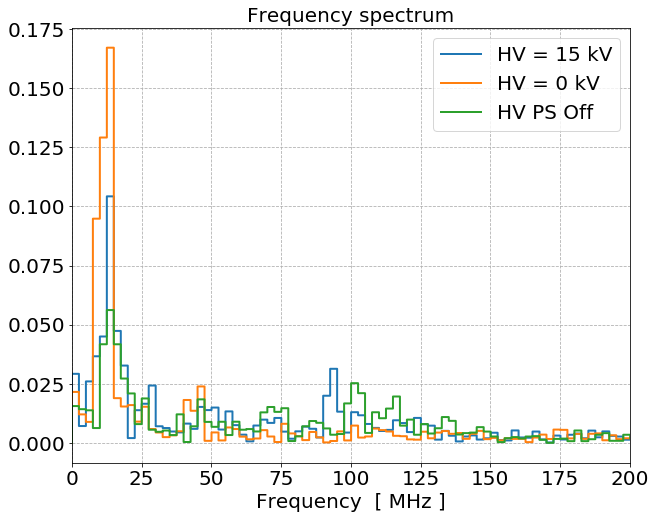

In [14]:
plt.figure(figsize = (10,8))
plt.plot( freq15kV/1e6, coeff15kV, drawstyle = "steps", label = 'HV = 15 kV', lw = 2 )
plt.plot( freq0kV/1e6, coeff0kV, drawstyle = "steps", label = 'HV = 0 kV', lw = 2 )
plt.plot( freqPSOff/1e6, coeffPSOff, drawstyle = "steps", label = 'HV PS Off', lw = 2 )

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.grid(which = "both", linestyle = '--')

plt.xlabel( 'Frequency  [ MHz ]', fontsize = 20 )
plt.title( 'Frequency spectrum', fontsize = 20 )

plt.legend( loc = 'upper right', fontsize = 20 )

plt.xlim(0, 200)
plt.show()

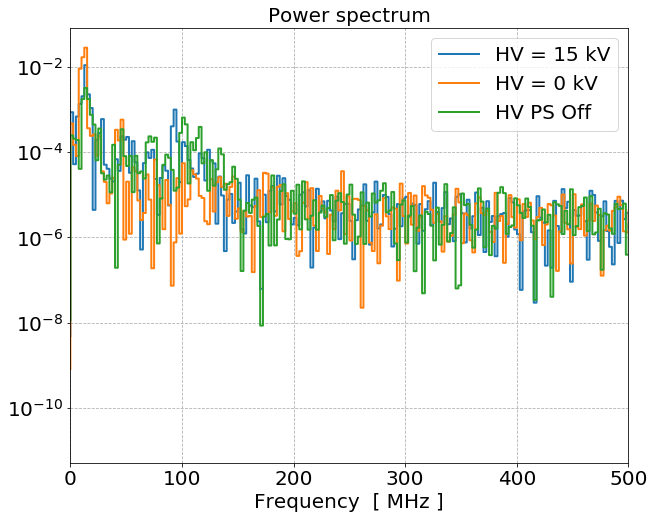

In [15]:
plt.figure(figsize = (10,8))
plt.plot( freq15kV/1e6, coeff15kV**2, drawstyle = "steps", label = 'HV = 15 kV', lw = 2 )
plt.plot( freq0kV/1e6, coeff0kV**2, drawstyle = "steps", label = 'HV = 0 kV', lw = 2 )
plt.plot( freqPSOff/1e6, coeffPSOff**2, drawstyle = "steps", label = 'HV PS Off', lw = 2 )


plt.xticks( fontsize = 20 )
plt.yticks( fontsize = 20 )
plt.grid( which = "both", linestyle = '--')
plt.xlabel( 'Frequency  [ MHz ]', fontsize = 20 )
plt.title( 'Power spectrum', fontsize = 20 )

plt.legend( loc = 'upper right', fontsize = 20 )

plt.semilogy()
plt.xlim(0, 500)

plt.show()